# Ciencia de Datos. TP5: Inferencia Bayesiana

Axel Maddonni, LU 200/14 <br>
Federico Patane, LU 683/10<br>


*Noviembre 2017*

***

# Modelo Beta-Binomial para la moneda

## Implementación

Aclaración: Los experimentos se realizaron con prior Beta(1,1) y Beta(60,60) debido a que utilizando Beta(100,100) arrojaba un error numérico.

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pymc3 as pm
import seaborn as sns
from scipy import stats

In [2]:
def test_model(*args, **kwargs):
    basic_model = pm.Model()
    
    n = kwargs.get('n', None)
    h = kwargs.get('h', None)
    alpha = kwargs.get('alpha', None)
    beta = kwargs.get('beta', None)
    niter = kwargs.get('niter', None)
    
    if (n is None or h is None or alpha is None or beta is None):
        print("Falta un parametro")
        return

    niter = 2000 if niter is None else niter

    with basic_model:
        # Priors for unknown model parameters
        theta = pm.Beta('theta', alpha=alpha, beta=beta)

        # Likelihood (sampling distribution) of observations
        k = pm.Binomial('k', p=theta, n=n, observed=h)
        
        # Para las predicciones
        k_obs = pm.Bernoulli('k_obs', p=theta)

        # Inference
        trace = pm.sample(niter, step=pm.Metropolis(), progressbar=True)

    plt.figure(figsize=(15,10))
    plt.title("Posteriori, luego de %i caras usando como prior Beta(%i,%i)" %(h, alpha, beta))
    sns.distplot(trace['theta'], label='post')
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
    plt.legend(loc='best');
    plt.show()

    map_estimate = pm.find_MAP(model=basic_model)
    print("\n RESÚMENES")
    print("Media de la posteriori obtenida para theta: %f" % trace['theta'].mean())
    print("MAP obtenido para theta: %f" % map_estimate['theta'])

    print("\n PREDICCIÓN")
    print("Resultados del Experimento Bernoulli para %i iteraciones con el theta generado a partir del modelo" % niter)
    print("Cantidad de Secas:%i" % (len(trace['k_obs']) - sum(trace['k_obs'])))
    print("Cantidad de Caras:%i" % sum(trace['k_obs']))
    print("Probabilidad de salir cara: %f" % (sum(trace['k_obs']) / float(niter)))

## Modelo con prior Beta(1,1)

### 6 caras

100%|██████████| 2500/2500 [00:00<00:00, 3875.02it/s]


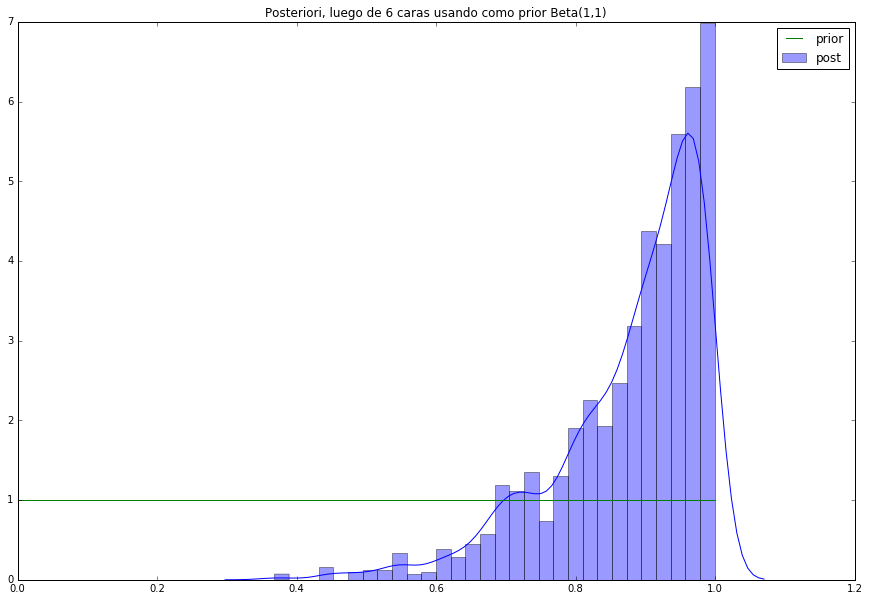

logp = -4.852, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 1667.05it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.879309
MAP obtenido para theta: 0.857143

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:247
Cantidad de Caras:1753
Probabilidad de salir cara: 0.876500


In [3]:
test_model(n=6,h=6,alpha=1,beta=1)

### 3 caras

100%|██████████| 2500/2500 [00:00<00:00, 3717.86it/s]


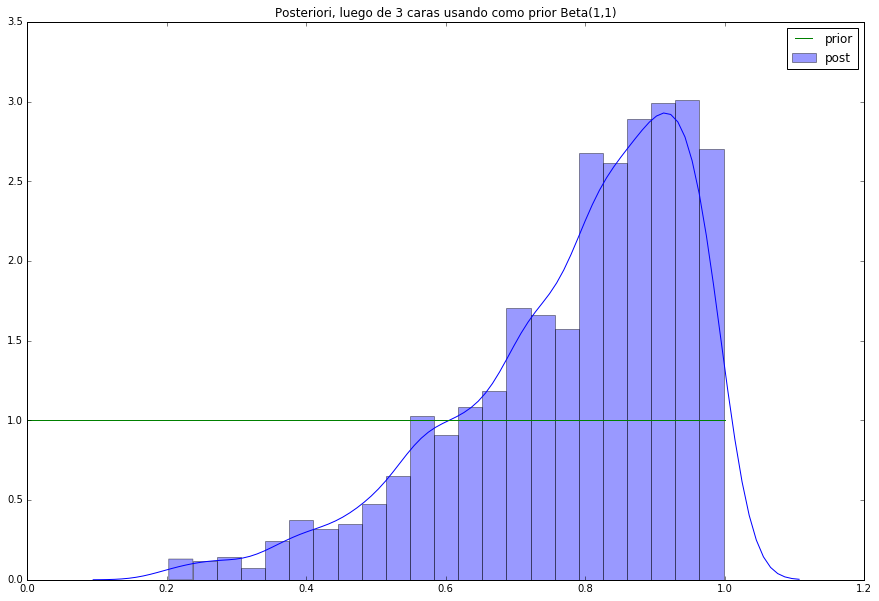

logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 1208.44it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.782319
MAP obtenido para theta: 0.750000

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:403
Cantidad de Caras:1597
Probabilidad de salir cara: 0.798500


In [4]:
test_model(n=3,h=3,alpha=1,beta=1)

### 20 caras

100%|██████████| 2500/2500 [00:00<00:00, 3941.18it/s]


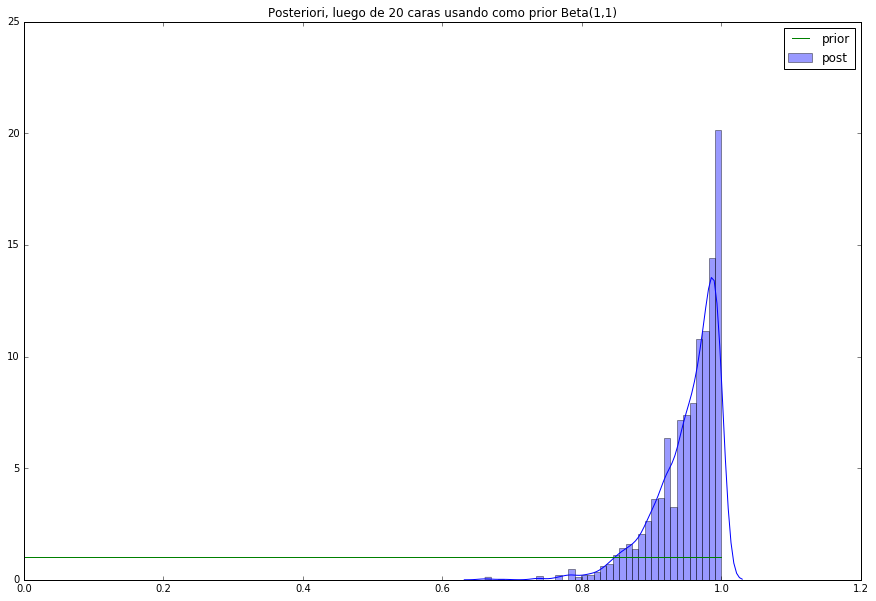

logp = -14.556, ||grad|| = 9.5: 100%|██████████| 10/10 [00:00<00:00, 1575.03it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.951737
MAP obtenido para theta: 0.952381

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:102
Cantidad de Caras:1898
Probabilidad de salir cara: 0.949000


In [5]:
test_model(n=20,h=20,alpha=1,beta=1)

## Modelo con prior Beta(60,60)

### 6 caras

100%|██████████| 2500/2500 [00:00<00:00, 3541.45it/s]


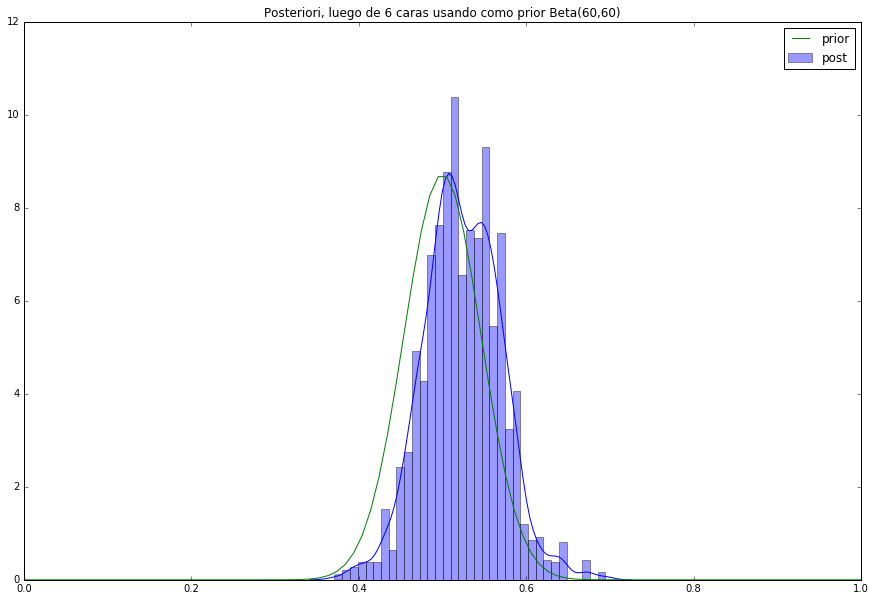

logp = -2.6862, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 1380.01it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.523636
MAP obtenido para theta: 0.520000

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:914
Cantidad de Caras:1086
Probabilidad de salir cara: 0.543000


In [6]:
test_model(n=6,h=6,alpha=60,beta=60)

### 3 caras

100%|██████████| 2500/2500 [00:00<00:00, 3788.18it/s]


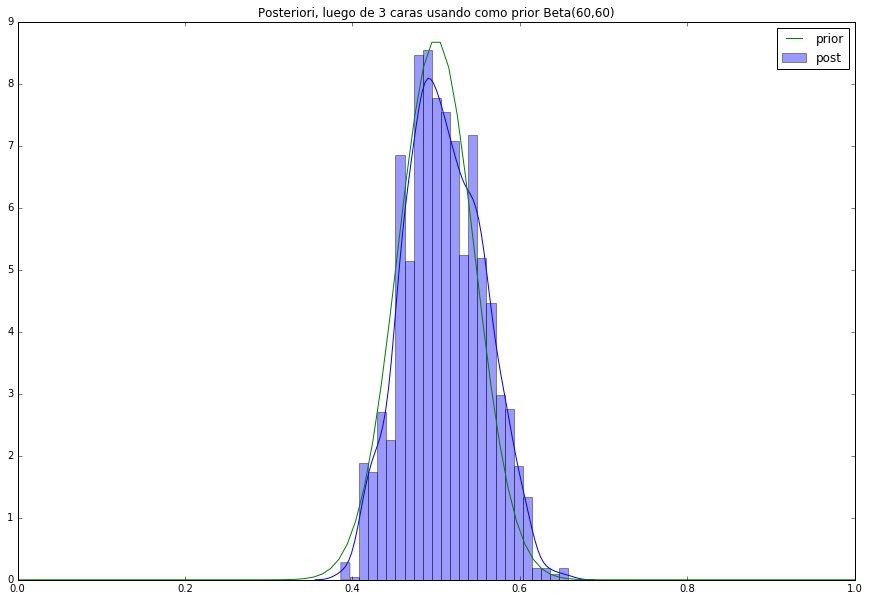

logp = -0.60671, ||grad|| = 1: 100%|██████████| 5/5 [00:00<00:00, 1377.44it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.509325
MAP obtenido para theta: 0.508197

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:969
Cantidad de Caras:1031
Probabilidad de salir cara: 0.515500


In [7]:
test_model(n=3,h=3,alpha=60,beta=60)

### 20 caras

100%|██████████| 2500/2500 [00:00<00:00, 3565.47it/s]


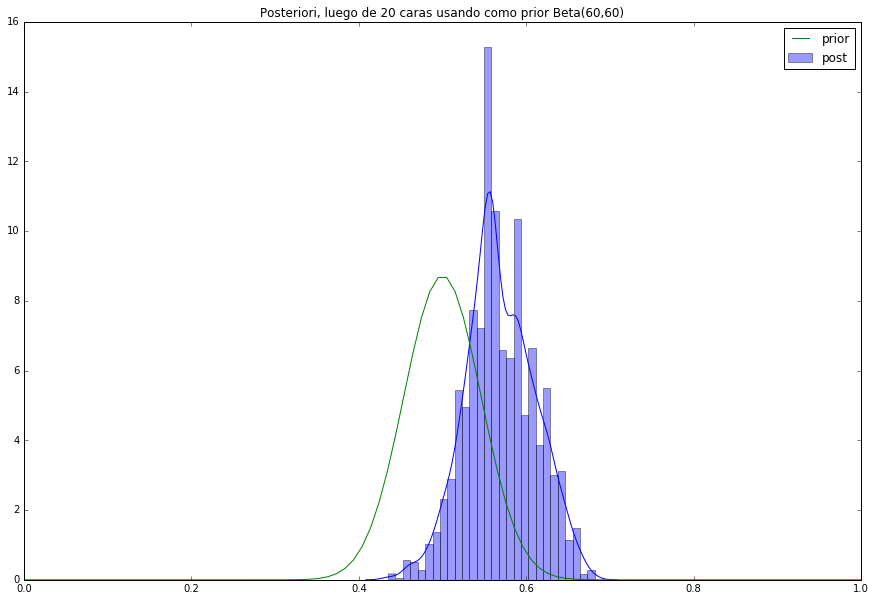

logp = -12.39, ||grad|| = 9.5: 100%|██████████| 6/6 [00:00<00:00, 1641.07it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.568863
MAP obtenido para theta: 0.568345

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:825
Cantidad de Caras:1175
Probabilidad de salir cara: 0.587500


In [18]:
test_model(n=20,h=20,alpha=60,beta=60)

## Conclusiones

En los modelos generados con prior Beta(1,1), al observar tan solo 3 caras de 3 tiradas se obtiene una probabilidad alta de obtener nuevamente una cara (0.798) debido a que la posteriori se ve altamente influenciada por las observaciones. Esto se debe a que esta priori no dice nada sobre la moneda al momento del inicio del modelo. Entonces, con unas pocas tiradas se tienen resultados muy extremos, asemejándose a lo que resultaría utilizando un modelo de estadística frecuencial. Las predicciones realizadas a partir de este modelo permitirían afirmar que la siguiente moneda saldría cara, dado los valores obtenidos luego de los experimentos Bernoulli, con probabilidades aproximadamente mayores o iguales a 0.8 de obtener cara.

En cambio, en los modelos con prior Beta(60,60), partimos de una creencia inicial más importante sobre la moneda. Se puede ver en los gráficos que la distribución de la prior parece describir una moneda equilibrada. Luego del experimento con varias caras, se observa que dicha distribución se corre hacia la derecha, indicando un aumento en la probabilidad de que la moneda se encuentre cargada, aunque no es un resultado extremo como en el caso anterior. El gráfico mantiene su forma de campana, sólo que es desplazado cuanto mayor sea la cantidad de caras seguidas observadas. Las probabilidades obtenidas luego de cada experimento no permiten predecir con mucha fuerza el resultado de una siguiente moneda. Se puede ver que luego del experimento Bernoulli de 2000 iteraciones ninguna de las probabilidades obtenidas supera el valor 0.6 de obtener una cara.

En base a nuestra propia experiencia, creemos que con 10 caras seguidas podemos sospechar que la moneda está cargada. Probando con nuestros modelos, llegamos a la conclusión de que un prior Beta(5,5) asemejaría el modelo que nosotros creemos más cercano a la realidad, obteniendo luego de 10 caras una probabilidad de salir cara en la predicción de una nueva tirada mayor a 0.75. 

100%|██████████| 2500/2500 [00:00<00:00, 3883.00it/s]


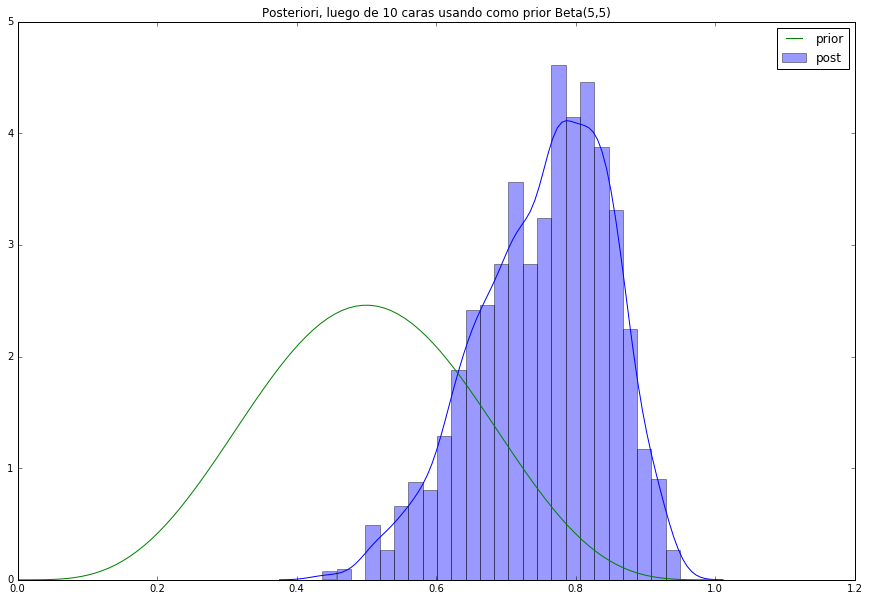

logp = -6.7241, ||grad|| = 4.5: 100%|██████████| 6/6 [00:00<00:00, 1615.06it/s]


 RESÚMENES
Media de la posteriori obtenida para theta: 0.754032
MAP obtenido para theta: 0.736842

 PREDICCIÓN
Resultados del Experimento Bernoulli para 2000 iteraciones con el theta generado a partir del modelo
Cantidad de Secas:443
Cantidad de Caras:1557
Probabilidad de salir cara: 0.778500


In [17]:
test_model(n=10,h=10,alpha=5,beta=5)